In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose
from torch.utils.data import DataLoader
from torchvision.transforms import RandomResizedCrop, ToTensor, RandomHorizontalFlip, RandomVerticalFlip, Normalize, ColorJitter, RandomRotation, Resize
import torchvision.transforms as T
import torch

In [ ]:
#pip3 install torch torchvision torchaudio
#코랩 pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

def checkShape(dataset):
    for idx, (image, label) in enumerate(dataset):
        print(f'Image {idx+1} shape: {image.shape}  label : {label}')
    


# 데이터 위치
dataset_dir = r".\\archive\\NA_Fish_Dataset\\"  #430개
# dataset_dir = r".\\archive\\Fish_Dataset\\" 정제 데이터 3, 445, 590


transform = T.Compose([T.Resize(224,224),T.ToTensor()])

# 데이터 호출
dataset = ImageFolder(dataset_dir, 
                      transform = T.ToTensor())  # 이미지 상위폴더 읽기 , PIL 이미지 또는 numpy 배열을 pytorch tensor로 변화 시켜주는  클래스

# 각 이미지의 크기 출력 확인
checkShape(dataset)

# 각 이미지 resize 적용


#PyTorch 데이터 로딩 유틸리티의 핵심  dataset을 input으로 넣어주면 여러 옵션(데이터 묶기, 섞기, 알아서 병렬처리)을 통해 batch를 만들어줍니다
datasetLoader = DataLoader(dataset, batch_size =32, shuffle = False)


print(type(dataset))  #3, 445, 590


std, mean = torch.zeros(3),torch.zeros(3)  # 0인 3차원텐서 초기화
num_images = len(datasetLoader.dataset)


# for images, _ in datasetLoader:
#     images = images.view(images.size(0), images.size(1), -1) # 채널 
#     mean += images.mean(2).sum(0)
#     print(mean )

# mean /= num_images


#images 텐서의 크기를 변경합니다. view 메서드를 사용하여 텐서를 재구조화합니다.
#images.size(0)는 배치 크기, images.size(1)는 채널 수로 유지하고, -1은 남은 차원을 하나의 차원으로 펼친다는 
#의미입니다.
#예를 들어, 만약 images 텐서의 크기가 [64, 3, 32, 32]라면, view 이후의 크기는 [64, 3, 1024]가 됩니다.

#for images, _ in dataset:
    #images = images.view(images.size(0), images.size(1), -1)
    #mean += images.mean(2).sum(0)
#    print(images)
#    break

#stack expects each tensor to be equal size, but got [3, 2128, 2832] at entry 0 and [3, 768, 1024] at entry 1


In [ ]:
#############################################

In [2]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose
from torch.utils.data import DataLoader
from torchvision.transforms import RandomResizedCrop, ToTensor, RandomHorizontalFlip, RandomVerticalFlip, Normalize, ColorJitter, RandomRotation, Resize
import torchvision.transforms as T
import torch

# 데이터 위치
#dataset_dir = r".\\archive\\NA_Fish_Dataset\\Fish_Dataset"  #430개
dataset_dir = r".\\archive\\Fish_Dataset\\Fish_Dataset\\" #정제 데이터 3, 445, 590


dataset = ImageFolder(dataset_dir, transform = ToTensor())
dataset = DataLoader(dataset, batch_size = 64, shuffle = True)

std, mean = torch.zeros(3),torch.zeros(3)
num_images = len(dataset.dataset)

for images, _ in dataset:
    images = images.view(images.size(0), images.size(1), -1)
    print(images.size(0), images.size(1))
    mean += images.mean(2).sum(0)
    break



64 3


In [ ]:

transform_img = T.Compose([
    
    RandomResizedCrop(size=(224, 224)),
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    ColorJitter(brightness = (0.5, 0.7)),
    RandomRotation(degrees = (0, 280)),
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean, std)
])

dataset = ImageFolder(dataset_dir, transform = transform_img)
dataset = DataLoader(dataset, batch_size = 128, shuffle = True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

images, labels = next(iter(dataset))

grid_img = torchvision.utils.make_grid(images).numpy()

grid_img = np.transpose(grid_img, (1, 2, 0))
grid_img = grid_img / 2 + 0.5 

plt.figure(figsize=(10,10))
plt.imshow(grid_img)
plt.axis('off')

classes = dataset.dataset.classes
print(classes)

plt.show()

In [ ]:
from torch.utils.data import random_split

train_size = int(0.80 * len(dataset.dataset))
valid_size = int(0.10 * len(dataset.dataset))
test_size = len(dataset.dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(dataset.dataset, [train_size, valid_size, test_size])

train_dataset = DataLoader(train_dataset, batch_size = 64, shuffle = True)
valid_dataset = DataLoader(valid_dataset, batch_size = 64, shuffle = True)
test_dataset = DataLoader(test_dataset, batch_size = 64, shuffle = True)

print(f"Train Dataset Size: {len(train_dataset.dataset)}")
print(f"Validation Dataset Size: {len(valid_dataset.dataset)}")
print(f"Test Dataset Size: {len(test_dataset.dataset)}")

In [ ]:
train_exp = int(0.40 * len(train_dataset.dataset))
rest_size = len(train_dataset.dataset) - train_exp

train_exp, _ = random_split(train_dataset.dataset, [train_exp, rest_size])
train_exp = DataLoader(train_exp, batch_size = 64, shuffle = True)

print(f"Experimental Train Dataset Size: {len(train_exp.dataset)}")

In [ ]:
epochs = [i for i in range(1, 71)]
lr = 0.01
drop = 0.15

In [ ]:
from torchvision.models import MobileNet_V3_Small_Weights 
import torch.nn as nn
import random

model = torchvision.models.mobilenet_v3_small(weights = MobileNet_V3_Small_Weights.IMAGENET1K_V1)

for name, child in model.named_children():
    if 'layer' in name:
        for name2, params2 in child.named_children():
            setattr(child, name2, torch.nn.Sequential(params2, torch.nn.Dropout(drop)))
            
num_layers = len(list(model.parameters()))
num_to_freeze = int(num_layers * 0.7)

for i, parameter in enumerate(model.parameters()):
    
    if i < num_to_freeze:
        parameter.requires_grad = False

In [ ]:
from IPython.display import clear_output, display
import pandas as pd
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = lr)

def fit(train_dataset, valid_dataset, model):
    
    data = []
    columns = ["Epoch", "Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy"]
    dataframe = []
    
    model.to(device)
    for epoch in epochs:
        
        model.train()
        train_total, train_correct, train_loss = 0,0,0

        for i, (images, labels) in enumerate(train_dataset):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _ , predicted = torch.max(outputs.data, 1)
            train_loss += loss.item()

            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            avg_train_loss = train_loss / (i+1)
            train_accuracy = 100 * train_correct / train_total

            clear_output(wait = True)
            print(f"Epoch: {epoch}, Train Accuracy: {train_accuracy:.2f}%, Train Loss: {avg_train_loss:.2f}")

        with torch.no_grad():
            
            model.eval()
            total, correct, validation_loss = 0,0,0
            
            for i, (images, labels) in enumerate(valid_dataset):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                _ , prediction = torch.max(outputs.data, 1)
                validation_loss += loss.item()

                total += labels.size(0)
                correct += (prediction == labels).sum().item()

                avg_validation_loss = validation_loss / (i + 1)
                accuracy = 100 * correct / total

                data.append([epoch, avg_train_loss, train_accuracy, avg_validation_loss, accuracy])
                df = pd.DataFrame(data, columns = columns)
                
                clear_output(wait = True)
                display(df.tail(1))
             
        dataframe.append([epoch, avg_train_loss, train_accuracy, avg_validation_loss, accuracy])
        dataf = pd.DataFrame(dataframe, columns = columns)
        clear_output(wait = True)
        display(dataf)
        
fit(train_exp, valid_dataset, model)

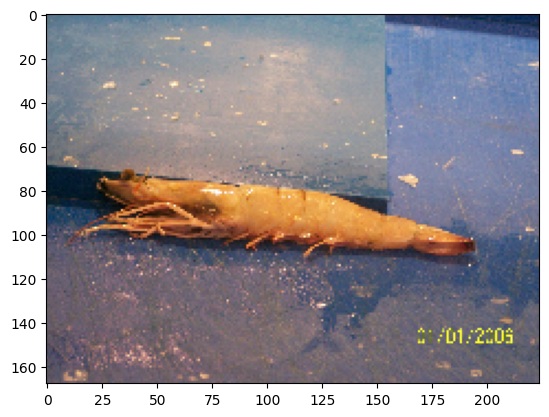

(168, 224, 3)
torch.Size([3, 168, 224])


In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import torch


#파일 위치 받기 , 변경사이즈 인자
dataset_dir = r".\\archive\\NA_Fish_Dataset\\Shrimp\\00026.png" #정제 데이터 3, 445, 590

def local2Img_resize(dataset_dir,screen=224):
    ''' 
        author : cij methods
        dataset_dir : local dirctory files
        screen : defult 224 size
        
        return : resize image , image shape (2 values )
    
    '''
    img= cv2.imread(dataset_dir)
    max_dimension = max(img.shape)
    retio = screen/max_dimension
    re_img=cv2.resize(img, (0,0), fx=retio, fy=retio, interpolation=cv2.INTER_LINEAR)
    return re_img,re_img.shape


img,sp=local2Img_resize(dataset_dir)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

print(sp)
trans_tenser=torch.rand(sp)
t=trans_tenser.permute(2, 0, 1)  # 텐서 채널 위치 변경 가능 
print(t.shape)



In [2]:
import time
import os
import copy

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from torchsummary import summary 



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg = models.vgg16().to(device)

summary(vgg, (3, 224, 224))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [6]:


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(nn.Conv1d(1, 64, kernel_size=3),
                                                     nn.MaxPool1d(2), 
                                                     nn.ReLU(),
                                                     nn.Conv1d(64, 128, kernel_size=3),
                                                     nn.MaxPool1d(2),
                                                     nn.ReLU(),
                                                     nn.Flatten(),
                                                     nn.Linear(3200,256),
                                                     nn.ReLU(),
                                                     nn.Linear(256, 10)
                                                    )
    def forward(self, x):
        x = self.model(x)
        return x




In [7]:
model = Model()

In [8]:
model.summary

AttributeError: 'Model' object has no attribute 'summary'

In [ ]:
#########################################


import os
import json
from glob import glob
from PIL import Image
import torch
from torch.utils.data import Dataset

class FishDataset(Dataset):
  def __init__(self,root_dir,mode,transform=None):
    """ 
    mode : train/val을 구분하기위해 편의상 만든 변수, 필요없다면 삭제 가능 
    """

    self.root_dir = root_dir
    self.transform = transform
    self.imglist,self.labellist = [],[]
    self.mode = mode
    """ 
    root_dir + 'train'/'val' 형태로 폴더가 저장되어 있을 경우 사용 가능
    label 이 json 파일에 저장되어 있는 경우
    """
    self.data_path = os.path.join(self.root_dir,self.mode)
    self.caption_path = os.path.join(self.root_dir,self.mode+'.json')
    self.imglist = glob(self.data_path + '/*')

    with open(self.caption_path,'r') as file:
      data = json.load(file)
    for imgname in self.imglist:
      self.labellist.append(data[imgname])
    
    assert len(self.imglist) == len(self.labellist)

  def __len__(self):
    return len(self.imglist)

  def __getitem__(self,idx):
    image = Image.open(self.imglist[idx])
    if self.transform:
      image = self.transform(image)
    label = self.labellist[idx]
    return image,label


In [20]:
import zipfile
import os

print(os.getcwd())

#짚파일 읽기 메서드

def localZip2IMG(zippath):
    myzip_r = zipfile.ZipFile(r'.\\archive.zip', 'r')
#print(myzip_r.read('license.txt'))

#with zipfile.ZipFile(base_dir, 'r') as myzip_all:
#    for f in myzip_all:
#        print( f.read())
#        break
    grid_img=myzip_r.namelist()[13800]
    zipImg=myzip_r.read(grid_img)
    print(grid_img)


    # 바이트 데이터를 numpy 배열로 변환
    image_array = np.frombuffer(zipImg, np.uint8)

    # OpenCV를 사용하여 numpy 배열을 이미지로 디코딩
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # 이미지를 RGB로 변환 (OpenCV는 기본적으로 BGR 형식으로 읽기 때문에)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 이미지 표시
    plt.imshow(img)
    plt.axis('off')  # 축 제거 (선택 사항)
    plt.show()
    
    
    

myzip_r = zipfile.ZipFile(r'.\\archive.zip', 'r')
grid_img=myzip_r.namelist()[13800]
zipImg=myzip_r.read(grid_img)
print(type(zipImg)) 
image_array = np.frombuffer(zipImg, np.uint8)
print(type(image_array)) 

c:\fish
<class 'bytes'>
<class 'numpy.ndarray'>


AttributeError: 'NoneType' object has no attribute 'shape'